# Flujo de Trabajo Básico

Aunque no sea un flujo de trabajo completo, se pueden definir los pasos básicos para trabajar en una red neuronal como los siguientes:


1. Definir el conjunto de entrenamiento
2. Definir el modelo de red neuronal
3. Configurar el proceso de aprendizaje
4. Entrenar el modelo 


## Conjunto de Entrenamiento

Debemos definir nuestra entrada y nuestra salida con el fin de que se pueda entrenar la red.

El principal trabajo del científico de datos es dado un problema y una serie de fuentes de datos conformar mediante procesos de consulta, limpieza, agregación, etc. el conjunto de datos que va a ser objeto de estudio. Esto es una tarea que no está directamente relacionada con las redes neuronales. 

En este ejemplo generamos unos datos de entrenamiento y test totalmente aleatorios (!?)

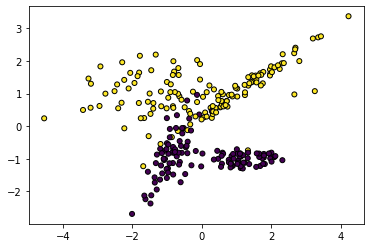

In [1]:
# Define the training data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 400, n_features=2, n_redundant=0, n_informative=2, n_classes = 2, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,s=25, edgecolor='k')




# Red Neuronal

Para definir la red neuronal con Keras vamos a utilizar el modelo secuencial (Sequential model class) con ello vamos a tener un conjunto de capas distribuidas linealmente. 

Su utilización es sencilla se crea el modelo base mediante el constructor correspondiente para posteriormente ir añadiendo capas a la estructura de la red.

En nuestro ejemplo vamos a establecer dos capas densamente conectadas (las típicas en las Redes Neuronales básicas):

1. **Capa de Entrada**: Es necesario espeficiar el número de entradas que corresponderá al tamaño de los vectores/tensores que hayamos especificado como entrada en el conjunto de entrenamiento (2) y la salida serán 4 (2 * número de características) . La función de activación es relu

2. **Capa de Salida**: Esta capa de salida toma como entradas las salidas de la anterior en la secuencia  y si que es necesario específicar el número de salidas correspondiente, en este caso 1 por ser clasificación binaria. 

Para las diferentes capas se han elegido las siguientes funciones de activación:

* *relu* :  Activa un nodo si la entrada está por encima de cierto umbral, por ejemplo que tenga un valor por encima de cero. Si se da el caso la salida es una relación lineal con la variable de entrada de forma f(x) = x. Es una función que ha demostrado su utilidad en un amplio rango de aplicaciones.

* *sigmoid*: convierte variables independientes de amplio rango en probabilidades simples entre cero y 1. La mayor parte de su salida estará muy cerca de los extremos de 0 y 1. Nos dará la probabilidad de cada una de las clases.


In [2]:
# Define the neural network model
from keras import models
from keras import layers

INPUT_DIM = X_train.shape[1]

model = models.Sequential()
model.add(layers.Dense(4, activation='relu',input_dim =INPUT_DIM))
model.add(layers.Dense(2, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

Y podemos observar como ha quedado nuestra red

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


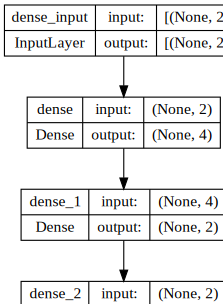

In [5]:
# Output network visualization
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

## Configuración del Proceso de Aprendizaje

Una vez que tenemos los datos y el modelo (la topología) entonces es necesario parametrizar el proceso de aprendizaje, agregando una función de coste, un optimizador y las métricas de rendimiento. Esto se llama modelo de "compilación" en Keras.

- **Función de Pérdida (loss function)**: es una función que, dados los valores predichos y los valores reales de los ejemplos, le proporciona una medida escalar de la adecuación de su modelo a los datos que tiene. La elección de la mejor función de pérdida reside en entender qué tipo de error es o no es aceptable para el problema en concreto. 
    *binary_crossentropy* aumenta a medida que la probabilidad pronosticada difiere de la etiqueta real. Por lo tanto, predecir una probabilidad de 0,012 cuando la etiqueta de observación real es 1 sería malo y daría lugar a un valor de pérdida elevado. Un modelo perfecto tendría valor de 0. Mas info en [enlace](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

- **Optimizador (optimizer)**: Algoritmo de optimización que permite a la red neuronal calcular los pesos de los parámetros a partir de los datos de entrada y de la función de pérdida definida. Keras dispone en estos momentos de diferentes optimizadores que pueden usarse: SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

    - **Adam**. Combina dos modificaciones al descenso de gradiente tradicional: Descenso de gradiente con momento, RMSprop. Requerimientos de memoria relativamente bajos Por lo general funciona bien incluso con poca optimización de hiperparámetros
    - **Adagrad**: Realiza grandes actualizaciones para parámetros poco frecuentes y pequeñas actualizaciones para parámetros frecuentes. Por esta razón, es adecuado para tratar con datos escasos. No necesitamos ajustar el ratio de aprendizaje manualmente. La mayoría de las implementaciones utilizan un valor por defecto de 0,01 y funcionan bien.

- **Métricas**: Medida del rendimiento de la red.  




In [6]:
# Configure the learning process
from keras import optimizers
from keras import metrics

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['binary_accuracy'])

El entrenamiento está vinculado en cualquier modelo de aprendizaje al método fit, que recibe al menos los datos de entrenamiento (X_train) y sus etiquetas (y_train) además en este caso se establece dos parámetros adicionales: 

- **batch_size**: El algoritmo funciona por lotes del tamaño que se especifica. la red se entrena (forward/backward) a ala vez por cada batch size. Si es un valor bajo será un entrenamiento más rápido y que consuma menos recursos, pero también menos preciso. Suele ser una buena práctica que m sea potencia de 2: 128, 256, etc...

- **Número de epocas**: Número de veces en la que todos los datos de entrenamiento han pasado por la red neuronal en el pceso de entrenamiento. Se suele incrementar el número de epochs hasta que el rendimiento de la red decrece. 




In [7]:
# Train the model
model.fit(X_train, y_train, 
          batch_size=10, 
          epochs=15)

Epoch 1/15
27/27 [==============================] - 1s 2ms/step - loss: 0.8836 - binary_accuracy: 0.5037
Epoch 2/15
27/27 [==============================] - 0s 2ms/step - loss: 0.8151 - binary_accuracy: 0.4851
Epoch 3/15
27/27 [==============================] - 0s 1ms/step - loss: 0.7554 - binary_accuracy: 0.5037
Epoch 4/15
27/27 [==============================] - 0s 1ms/step - loss: 0.7052 - binary_accuracy: 0.5299
Epoch 5/15
27/27 [==============================] - 0s 1ms/step - loss: 0.6622 - binary_accuracy: 0.5709
Epoch 6/15
27/27 [==============================] - 0s 1ms/step - loss: 0.6277 - binary_accuracy: 0.5896
Epoch 7/15
27/27 [==============================] - 0s 1ms/step - loss: 0.5933 - binary_accuracy: 0.6306
Epoch 8/15
27/27 [==============================] - 0s 2ms/step - loss: 0.5542 - binary_accuracy: 0.6716
Epoch 9/15
27/27 [==============================] - 0s 2ms/step - loss: 0.5204 - binary_accuracy: 0.7276
Epoch 10/15
27/27 [==============================] - 0s

# Evaluación

Podemos proceder a una evaluación básica

In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.42978397011756897
Test accuracy: 0.6969696879386902


Y también podemos construir la matriz de confusión una tabla con filas y columnas que contabilizan las predicciones en comparación con los valores reales. En este caso al ser clasificación binaria una 2x2

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n" 
      +classification_report(y_true, y_pred))
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

5/5 [==============================] - 0s 2ms/step
Metrics 
              precision    recall  f1-score   support

           0       0.95      0.49      0.64        74
           1       0.60      0.97      0.74        58

    accuracy                           0.70       132
   macro avg       0.77      0.73      0.69       132
weighted avg       0.79      0.70      0.68       132

Confusion matrix, without normalization
[[36 38]
 [ 2 56]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

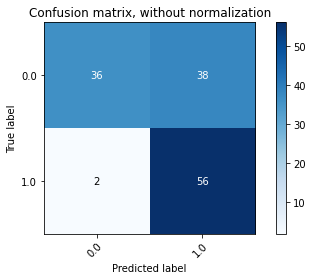

In [10]:
y_pred = model.predict(X_test).round()
plot_confusion_matrix(y_test, y_pred, classes = unique_labels(y_pred))